**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Introducción al Aprendizaje Automático- Edición 2022**

# GRUPO 1

**Integrantes:** 


*   Laura Ailin Feu Marquestau
*   Matias Miguel Mengual Figueroa 
*   Marcelo Perea
*   Natalia Giselle Tassin
*   Ignacio Villagra Torcomian

# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [ ]:
import numpy as np
import pandas as pd

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics as ms
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn import tree
import matplotlib.pyplot as plt



## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/DiploDatos/IntroduccionAprendizajeAutomatico/master/data/loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

1. El dataset contiene información de referencia y de rendimiento de préstamos para 5.690 préstamos recientes sobre el valor acumulado de la vivienda.

2. La variable objetivo es una variable binaria que indica si un solicitante del préstamos incumplió (target=1) o si pagó (target=0). 

3. Para hacer la predicción, el dataset cuenta con los siguientes atributos:


*   LOAN: Cantidad del préstamo solicitado.
*   MORTDUE: Cantidad adeudada en la hipoteca existente
*   VALUE: Valor de la propiedad actual
*   YOJ: Años en el trabajo actual
*   DEROG: Número de informes despectivos importantes
*   DELINQ: Número de líneas de crédito morosas
*   CLAGE: Antigüedad de la línea comercial más antigua en meses
*   NINQ: Número de líneas de crédito recientes
*   CLNO: Número de líneas de crédito
*   DEBTINC: Relación deuda-ingresos














4. Imaginamos que los atributos más determinantes para realizar la predicción son LOAN, MORTDUE, VALUE, DEROG, DELINQ, NINQ, CLNO y DEBTINC

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


In [ ]:
dataset.head()

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,0,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,0,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,0,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,0,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106


In [ ]:
dataset.TARGET.value_counts()

0    1545
1     309
Name: TARGET, dtype: int64

In [ ]:
dataset.isna().sum()

TARGET     0
LOAN       0
MORTDUE    0
VALUE      0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [ ]:
dataset.shape

(1854, 11)

In [ ]:
X_train.shape, X_test.shape

((1483, 10), (371, 10))

In [ ]:
y_train.shape, y_test.shape 

((1483,), (371,))

### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

En primer lugar, es necesario escalar los datos antes de entrenar el modelo.

In [ ]:
# Se aplica el escalado tanto en el conjunto de entrenamiento como en el conjunto de prueba
scaler = StandardScaler()
scaler.fit(X_train)  
X_train_slcd = scaler.transform(X_train)
X_test_slcd = scaler.transform(X_test)  

Luego, entrenamos el modelo utilizando el SGD Classifier tomando los valores por omisión y solo fijando la semilla aleatoria

In [ ]:
model_sgd = SGDClassifier(random_state=0)
model_sgd.fit(X_train_slcd, y_train)

SGDClassifier(random_state=0)

Calculamos la predicción para la variable objetivo tomando el modelo entrenado usando como input el conjunto de prueba

In [ ]:
y_test_pred = model_sgd.predict(X_test_slcd)

In [ ]:
y_test_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
np.array(y_test)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

**Evaluación sobre el conjunto de entrenamiento**

In [ ]:
y_train_pred = model_sgd.predict(X_train_slcd)

In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1232
           1       0.71      0.42      0.53       251

    accuracy                           0.87      1483
   macro avg       0.80      0.69      0.73      1483
weighted avg       0.86      0.87      0.86      1483



**Matriz de confusión (conjunto de entrenamiento)**

In [ ]:
confusion_matrix(y_train, y_train_pred)

array([[1190,   42],
       [ 146,  105]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


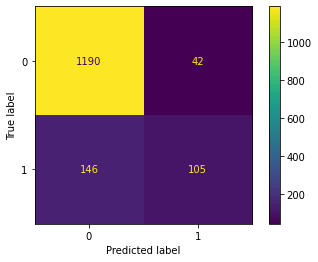

In [ ]:
plot_confusion_matrix(model_sgd, X_train_slcd, y_train)  

**Evaluación sobre el conjunto de prueba**

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       313
           1       0.65      0.34      0.45        58

    accuracy                           0.87       371
   macro avg       0.77      0.65      0.69       371
weighted avg       0.85      0.87      0.85       371



**Matriz de confusión (conjunto de prueba)**

In [ ]:
confusion_matrix(y_test, y_test_pred)

array([[302,  11],
       [ 38,  20]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


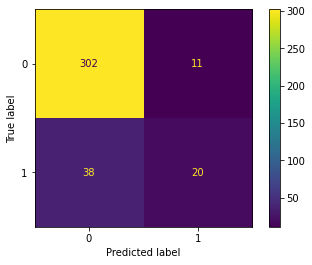

In [ ]:
plot_confusion_matrix(model_sgd, X_test_slcd, y_test)  

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

**Búsqueda de parámetros con grid search**

In [ ]:
model_sgd2 = SGDClassifier(random_state=0, eta0=0.001) # Elegimos un eta mayor que cero, ya el parámetro learning_rate constante lo requiere, y el default es cero.
model_sgd2.get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

En primer lugar, definimos un diccionario con los principales parámetros del modelo SGD Classifier, como loss, penalty, alpha o learning_rate con distintas funciones que puede tomar cada una.

In [ ]:
param_grid = {
    'loss': ['hinge', 'log', 'perceptron'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.000001, 0.0001, 0.001, 0.01, 1, 10, 100.0],
    'learning_rate':['optimal','invscaling', 'adaptive'],
}

print(f'Combinaciones posibles: {len(ParameterGrid(param_grid))}')


Combinaciones posibles: 189


Luego, GridSearchCV realiza una validación cruzada sobre la grilla anterior de parámetros y devuelve el mejor clasificador obtenido.

In [ ]:
# Se entrena el modelo con el conjunto de entrenamiento
cv = GridSearchCV(model_sgd2, param_grid, scoring='accuracy', cv=5)
cv.fit(X_train_slcd, y_train);


In [ ]:
results = cv.cv_results_
params = results['params']
mean = results['mean_test_score']
std = results['std_test_score']
rank = results['rank_test_score']


Se evalúan los resultados para diferentes combinaciones de resultados

In [ ]:
df = pd.DataFrame(results)
df[['param_loss', 'param_learning_rate','param_penalty','param_alpha','mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by=['rank_test_score'], ascending=True)

,param_loss,param_learning_rate,param_penalty,param_alpha,mean_test_score,std_test_score,rank_test_score
81,hinge,optimal,l2,0.01,0.869185,0.007788,1
57,log,optimal,l2,0.001,0.868525,0.012093,2
75,log,adaptive,l2,0.001,0.868512,0.011873,3
23,log,adaptive,elasticnet,0.000001,0.868512,0.011873,3
84,log,optimal,l2,0.01,0.868512,0.009762,3
...,...,...,...,...,...,...,...
164,hinge,optimal,elasticnet,100.0,0.434116,0.324123,181
163,hinge,optimal,l1,100.0,0.434116,0.324123,181
162,hinge,optimal,l2,100.0,0.434116,0.324123,181
170,perceptron,optimal,elasticnet,100.0,0.434116,0.324123,181


In [ ]:
# Elegimos el mejor modelo
best_model = cv.best_estimator_
best_model

SGDClassifier(alpha=0.01, eta0=0.001, random_state=0)

In [ ]:
# Obtenemos los parámetros del mejor modelo
best_par = cv.best_params_
best_par

{'alpha': 0.01, 'learning_rate': 'optimal', 'loss': 'hinge', 'penalty': 'l2'}

**Evaluación sobre el conjunto de entrenamiento**

In [ ]:
y_pred_train_best = best_model.predict(X_train_slcd) 

In [ ]:
# Métricas resumen para conjunto de entrenamiento (train)
print(classification_report(y_train, y_pred_train_best))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1232
           1       0.86      0.27      0.41       251

    accuracy                           0.87      1483
   macro avg       0.86      0.63      0.67      1483
weighted avg       0.87      0.87      0.84      1483



**Matriz de confusión (conjunto de entrenamiento)**

In [ ]:
confusion_matrix(y_train, y_pred_train_best)

array([[1221,   11],
       [ 184,   67]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


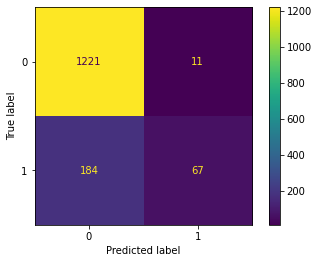

In [ ]:
plot_confusion_matrix(best_model, X_train_slcd, y_train)  

**Evaluación sobre el conjunto de prueba**

In [ ]:
y_pred_test_best = best_model.predict(X_test_slcd)

In [ ]:
print(classification_report(y_test, y_pred_test_best))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       313
           1       0.88      0.26      0.40        58

    accuracy                           0.88       371
   macro avg       0.88      0.63      0.67       371
weighted avg       0.88      0.88      0.85       371



**Matriz de confusión (conjunto de prueba)**

In [ ]:
confusion_matrix(y_test, y_pred_test_best)

array([[311,   2],
       [ 43,  15]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


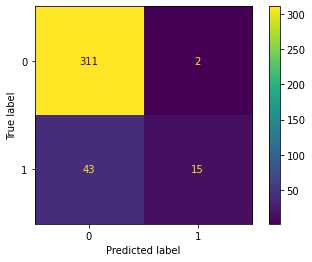

In [ ]:
plot_confusion_matrix(best_model, X_test_slcd, y_test)  

Si comparamos los resultados del primer modelo (parámetros por default) con los del segundo modelo (mejor combinación de parámetros), tomando el conjunto de entrenamiento notamos que:
- la métrica accuracy se mantiene inalterada.
- mejora la precisión de la categoría 1, mientras que en la categoría 0 casi permanece invariable (en promedio hay una mejora significativa).
- empeora la métrica recall para la categoría 1.
- baja también el f1 score.

En cuanto al conjunto de prueba:
- Mejora la métrica accuracy.
- Mejora la precisión de la categoría 1 y el promedio.
- No hay grandes deiferencias en recall y f1 score.

 

Concluimos que el modelo con la mejor combinación de parámetros hallada es superior ya que mejoró la exactitud de la predicción y es importante a la hora de evaluar a qué clientes se le deben aprobar las solicitudes de préstamos y quiénes son más propensos a incuplir los pagos.

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


En primer lugar, se entrena el modelo  DecisionTreeClassifier utilizando los parámetros por defecto

In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

Predecimos utilizando el modelo tanto para el conjunto de entrenamiento como para el conjunto de prueba

In [ ]:
y_train_pred_clf_tree = clf.predict(X_train)
y_test_pred_clf_tree = clf.predict(X_test)

Graficamos el árbol para ver claramente todas las hojas que se generan

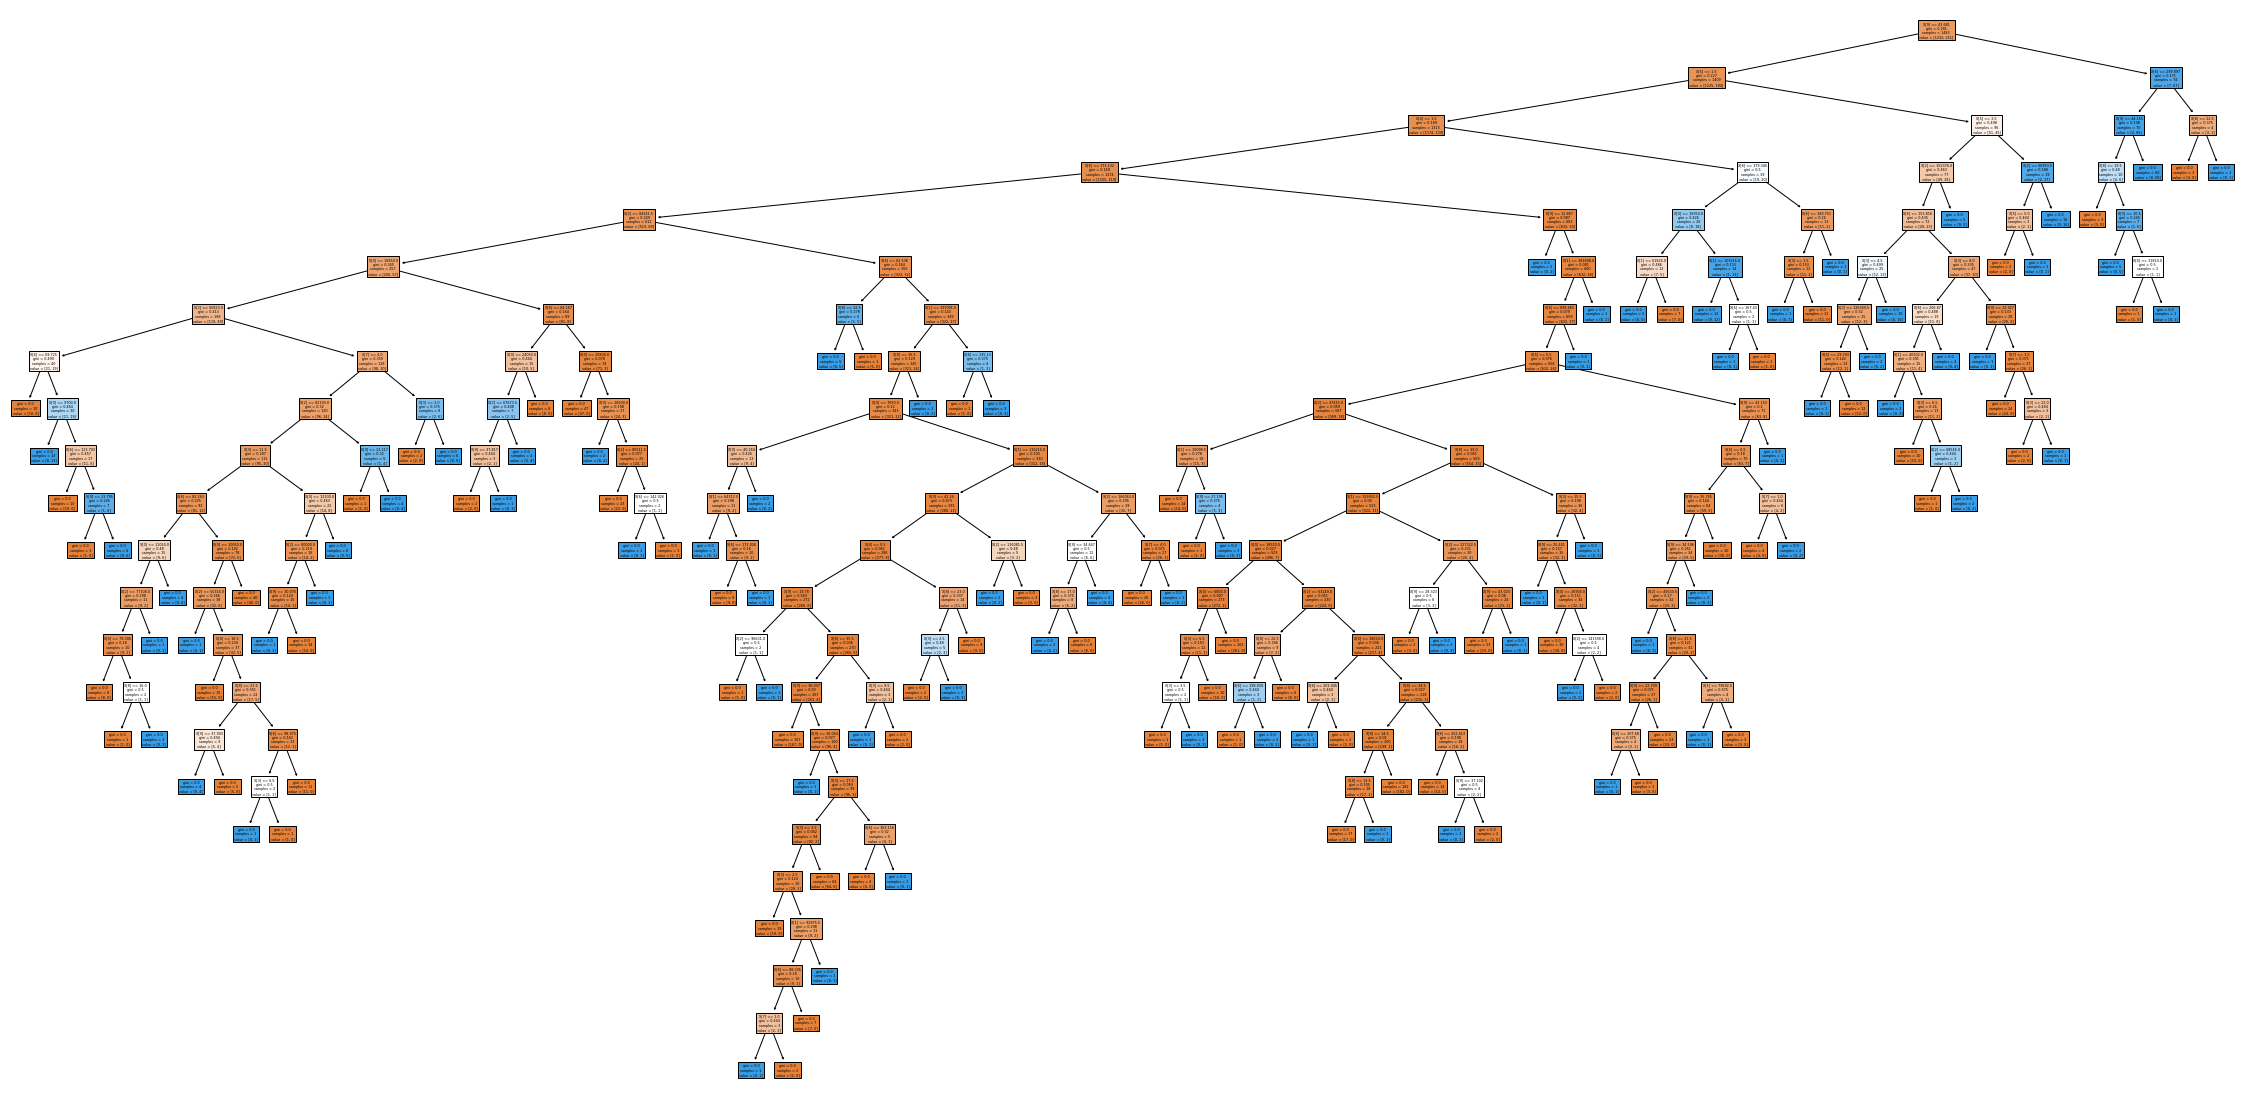

In [ ]:
fig, ax = plt.subplots(figsize=(40, 20))  
tree.plot_tree(clf, ax=ax, filled=True)
plt.show()

**Evaluación sobre el conjunto de entrenamiento**

In [ ]:
print(classification_report(y_train, y_train_pred_clf_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1232
           1       1.00      1.00      1.00       251

    accuracy                           1.00      1483
   macro avg       1.00      1.00      1.00      1483
weighted avg       1.00      1.00      1.00      1483



**Matriz de confusión (conjunto de entrenamiento)**

In [ ]:
cm=confusion_matrix(y_train, y_train_pred_clf_tree)
cm

array([[1232,    0],
       [   0,  251]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


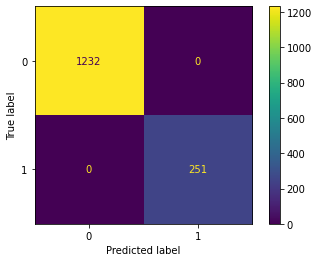

In [ ]:
plot_confusion_matrix(clf, X_train, y_train)  

**Evaluación sobre el conjunto de prueba**

In [ ]:
print(classification_report(y_test, y_test_pred_clf_tree))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       313
           1       0.62      0.64      0.63        58

    accuracy                           0.88       371
   macro avg       0.77      0.78      0.78       371
weighted avg       0.88      0.88      0.88       371



**Matriz de confusión (conjunto de prueba)**

In [ ]:
cm2=confusion_matrix(y_test, y_test_pred_clf_tree)
cm2

array([[290,  23],
       [ 21,  37]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


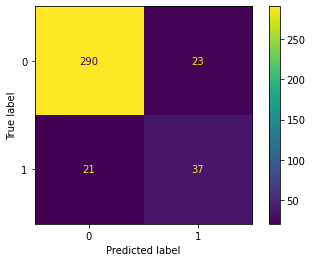

In [ ]:
plot_confusion_matrix(clf, X_test, y_test)  

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Vamos a utilizar GridSearch para optimizar los parámetros

In [ ]:
clf_2 = DecisionTreeClassifier(random_state=0) 
clf_2.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

Definimos la grilla de parámetros

In [ ]:
param_grid_tree = {
    'criterion': ['gini', 'entropy'],   #criterio de partición
    'max_depth': [2,4,6,8,10,12],   #profundidad máxima del arbol
    'min_samples_leaf': [1,2,3,4],    #cantidad mínima de samples por hoja
}

print(f'Combinaciones posibles: {len(ParameterGrid(param_grid_tree))}')

Combinaciones posibles: 48


Realizamos el Gris Search para buscar la mejor combinación de los parámetros

In [ ]:
model_tree = DecisionTreeClassifier(random_state=0)
grid_cv = GridSearchCV(model_tree, param_grid_tree, scoring='accuracy', cv=5)
grid_cv.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2, 3, 4]},
             scoring='accuracy')

In [ ]:
results = grid_cv.cv_results_
params = results['params']
mean = results['mean_test_score']
std = results['std_test_score']
rank = results['rank_test_score']

In [ ]:
df = pd.DataFrame(results)
df[['param_criterion', 'param_max_depth','param_min_samples_leaf','mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by=['rank_test_score'], ascending=True)

,param_criterion,param_max_depth,param_min_samples_leaf,mean_test_score,std_test_score,rank_test_score
13,gini,8,2,0.876490,0.020800,1
12,gini,8,1,0.875951,0.017506,2
0,gini,2,1,0.874871,0.010243,3
1,gini,2,2,0.874871,0.010243,3
2,gini,2,3,0.874871,0.010243,3
3,gini,2,4,0.874871,0.010243,3
14,gini,8,3,0.873796,0.019709,7
15,gini,8,4,0.873257,0.021980,8
5,gini,4,2,0.871644,0.024736,9
30,entropy,4,3,0.871635,0.012651,10


In [ ]:
# Elegimos el mejor modelo
best_model_tree = grid_cv.best_estimator_
best_model_tree

DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, random_state=0)

In [ ]:
# Obtenemos los parámetros del mejor modelo
best_par = grid_cv.best_params_
best_par

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2}

Predecimos con el mejor modelo utilizando tanto el conjunto de entrenamiento como el de prueba.

In [ ]:
y_train_pred_clf_tree_2 = best_model_tree.predict(X_train)
y_test_pred_clf_tree_2 = best_model_tree.predict(X_test)

Podemos graficar el árbol con los parámetros escogidos para ver cómo quedaría

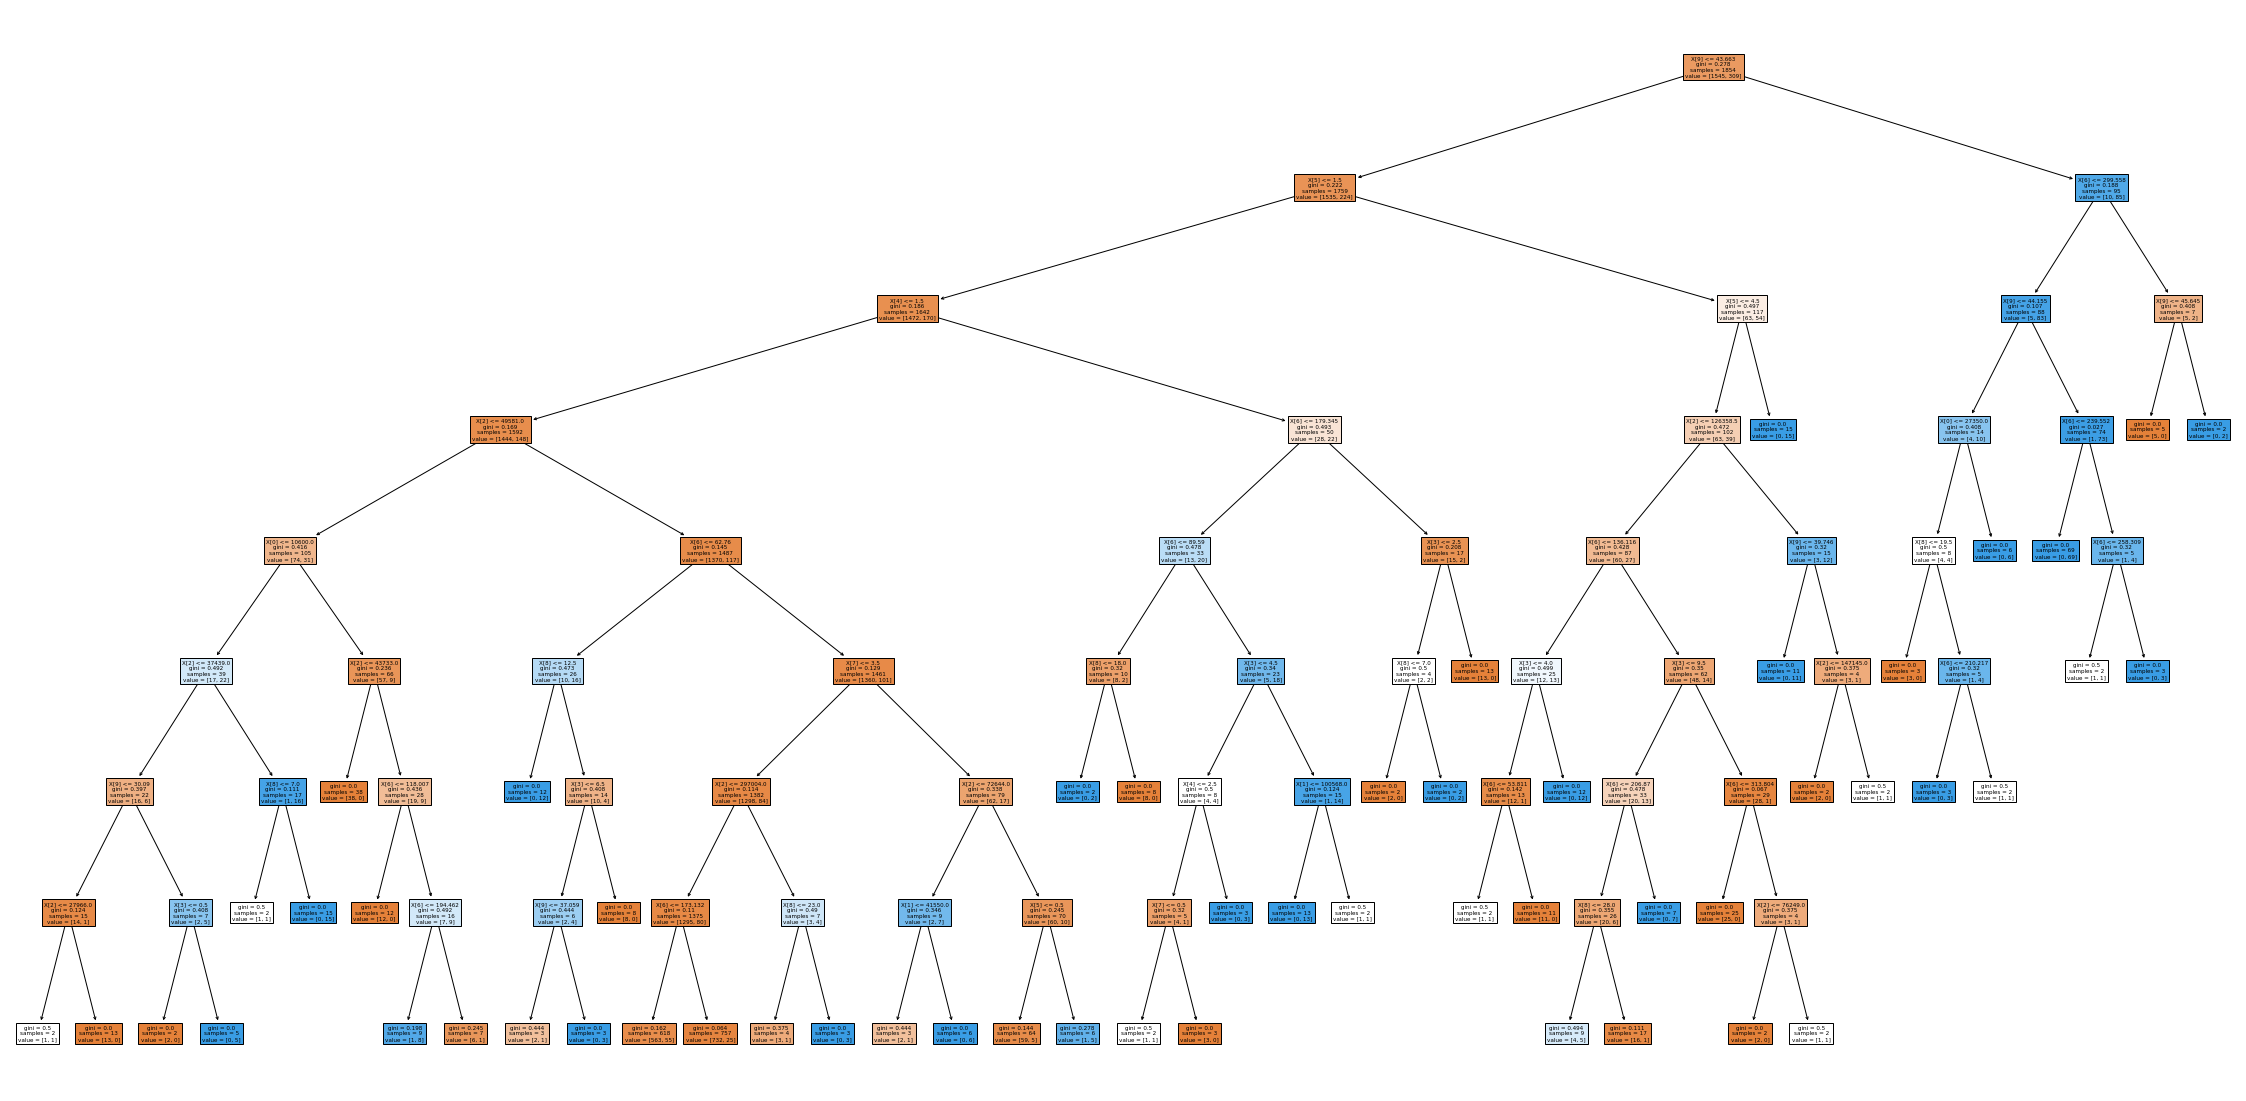

In [ ]:
fig, ax = plt.subplots(figsize=(40, 20))  
tree.plot_tree(best_model_tree, ax=ax, filled=True)
plt.show()

**Evaluación sobre el conjunto de entrenamiento**

In [ ]:
print(classification_report(y_train, y_train_pred_clf_tree_2))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1232
           1       0.97      0.69      0.80       251

    accuracy                           0.94      1483
   macro avg       0.95      0.84      0.89      1483
weighted avg       0.94      0.94      0.94      1483



**Matriz de confusión (conjunto de entrenamiento)**

In [ ]:
cm=confusion_matrix(y_train, y_train_pred_clf_tree_2)
cm

array([[1226,    6],
       [  78,  173]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


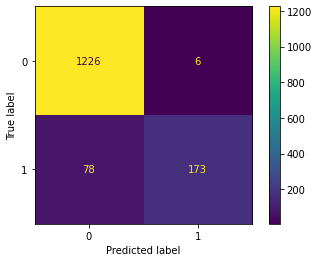

In [ ]:
plot_confusion_matrix(best_model, X_train, y_train)  

**Evaluación sobre el conjunto de prueba**

In [ ]:
print(classification_report(y_test, y_test_pred_clf_tree_2))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       313
           1       1.00      0.64      0.78        58

    accuracy                           0.94       371
   macro avg       0.97      0.82      0.87       371
weighted avg       0.95      0.94      0.94       371



**Matriz de confusión (conjunto de prueba)**

In [ ]:
cm2=confusion_matrix(y_test, y_test_pred_clf_tree_2)
cm2

array([[313,   0],
       [ 21,  37]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


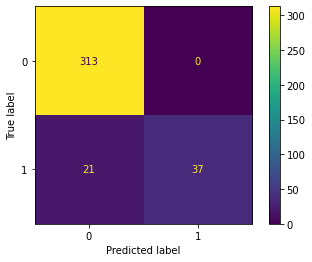

In [ ]:
plot_confusion_matrix(best_model, X_test, y_test)  

El modelo con la mejor combinación de parámetros presenta mejores mejores métricas para el conjunto de prueba que el modelo anterior (con los parámetros por defecto). Además, dado que se escogen los mejores parámetros, resulta en un modelo más simple y consume menos recursos. Por otro lado, se observa que el modelo con los parámetros por default sobreajusta en el conjunto de entrenamiento (métricas iguales a 1), lo que se ve reflejado en la profundidad del árbol. Por lo tanto, concluimos que el segundo modelo es mejor que el primero.  